# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=0fcdae27300d0d35f7c2443882b04849&units=imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------\nData Retrieval Completed\n-----------")

Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | matara
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | cockburn town
Processing Record 7 of Set 1 | miramar
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | sapernoye
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | fukue
Processing Record 12 of Set 1 | maragogi
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | faanui
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hay river
Processing Record 22 of Set 1 | turayf
Processing Record 23 of Set 1 | katsuura
Processing Record 24 of Set 1 | college
Proce

Processing Record 42 of Set 4 | coyaima
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | olden
City not found. Skipping...
Processing Record 47 of Set 4 | alibag
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | marsa matruh
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | ukiah
Processing Record 3 of Set 5 | rio blanco
Processing Record 4 of Set 5 | moba
Processing Record 5 of Set 5 | ucluelet
Processing Record 6 of Set 5 | rawson
City not found. Skipping...
Processing Record 7 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | deputatskiy
Processing Record 10 of Set 5 | samarai
Processing Record 11 of Set 5 | lazaro cardenas
Processing Record 12 of Set 5 | elat
Processing Record 13 of Set 5 | port lincoln
Pro

Processing Record 32 of Set 8 | mount isa
Processing Record 33 of Set 8 | kharan
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | segou
Processing Record 36 of Set 8 | maua
Processing Record 37 of Set 8 | lumsden
Processing Record 38 of Set 8 | taltal
Processing Record 39 of Set 8 | arani
Processing Record 40 of Set 8 | port-cartier
Processing Record 41 of Set 8 | svetlogorsk
Processing Record 42 of Set 8 | westport
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | thaba-tseka
City not found. Skipping...
Processing Record 45 of Set 8 | imperia
Processing Record 46 of Set 8 | biak
Processing Record 47 of Set 8 | chincholi
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Set 8 | klaksvik
Processing Record 1 of Set 9 | pueblo bello
Processing Record 2 of Set 9 | moerai
City not found. Skipping...
Processing Record 3 of Set 9 | bilibino
Processing Record 4 of Set 9 | tindwari
Processing Record 5 of Set 9 | shubarshi
Processing Rec

Processing Record 19 of Set 12 | aksarka
-----------
Data Retrieval Completed
-----------


In [5]:
weather_dictionary = {
                "City": city_two,
                "Cloudiness": cloudiness,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": lats,
                "Lng": lngs,
                "Max Temp": max_temps,
                "Wind Speed": wind_speeds
}

In [27]:

#Humidity Check - None are over 100%
weather_dictionary_df = pd.DataFrame(weather_dictionary)
weather_dictionary_df.sort_values(by='Humidity')
weather_dictionary_df.sort_values(by='Wind Speed')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
302,komsomolskiy,75,UZ,1607393761,91,40.43,71.72,32.00,0.16
286,talaya,65,RU,1607393759,86,61.38,152.75,-17.54,0.20
505,shache,100,CN,1607393798,96,38.42,77.24,15.64,0.36
514,soe,93,ID,1607393799,60,-9.86,124.28,83.89,0.36
156,tezu,0,IN,1607393735,43,27.92,96.17,66.51,0.38
...,...,...,...,...,...,...,...,...,...
277,kahului,40,US,1607393757,65,20.89,-156.47,82.40,26.40
434,talnakh,90,RU,1607393785,75,69.49,88.40,-14.80,29.08
371,stromness,100,GB,1607393774,93,58.97,-3.30,46.40,29.97
496,taman,0,RU,1607393796,79,45.21,36.72,24.80,31.32


In [7]:
#No humidity over 100 so this is clean data frame
clean_city_data = weather_dictionary_df

#Export data frame to csv
clean_city_data.to_csv('clean_city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
print('Can skip this step. No cities over 100% humidity.')

Can skip this step. No cities over 100% humidity.


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The code is analyzing the maximum temperature and corresponding latitude figure for each city in the clean_city_data dataframe.


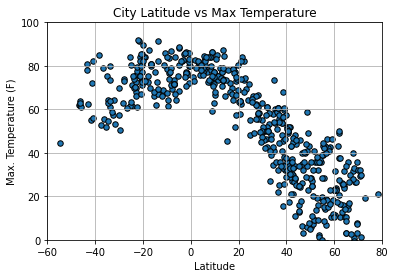

In [34]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()


print('The code is analyzing the maximum temperature and corresponding latitude figure for each city in the clean_city_data dataframe.')

plt.savefig("LATvMaxTemp.png")


## Latitude vs. Humidity Plot

The code is analyzing the maximum humidity and corresponding latitude figure for each city in the clean_city_data dataframe.


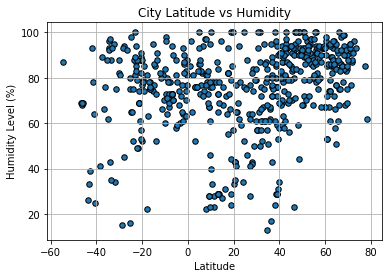

In [38]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()


print('The code is analyzing the maximum humidity and corresponding latitude figure for each city in the clean_city_data dataframe.')
plt.savefig("LATvHum.png")

## Latitude vs. Cloudiness Plot

The code is analyzing the cloudiness and corresponding latitude figure for each city in the clean_city_data dataframe.


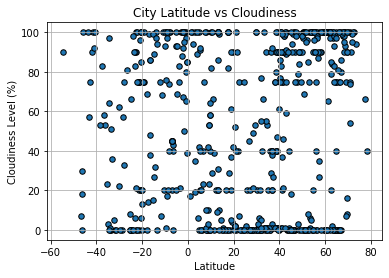

In [39]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()



print('The code is analyzing the cloudiness and corresponding latitude figure for each city in the clean_city_data dataframe.')
plt.savefig("LATvCloud.png")

## Latitude vs. Wind Speed Plot

The code is analyzing the maximum wind speed and corresponding latitude figure for each city in the clean_city_data dataframe.


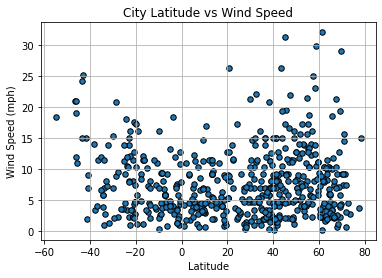

In [40]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()


print('The code is analyzing the maximum wind speed and corresponding latitude figure for each city in the clean_city_data dataframe.')
plt.savefig("LATvWind.png")

## Linear Regression

In [14]:
north_hemisphere = clean_city_data.loc[clean_city_data['Lat']>0.01]
south_hemisphere = clean_city_data.loc[clean_city_data['Lat']<-0.01]

north_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,faya,0,SA,1607393704,66,18.39,42.45,51.80,0.74
3,matara,0,LK,1607393705,82,5.95,80.54,79.00,3.76
4,broome,90,US,1607393706,79,42.25,-75.83,27.00,12.75
6,miramar,20,US,1607393706,88,25.99,-80.23,66.20,9.17
8,sapernoye,0,RU,1607393707,85,60.72,29.95,24.01,7.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

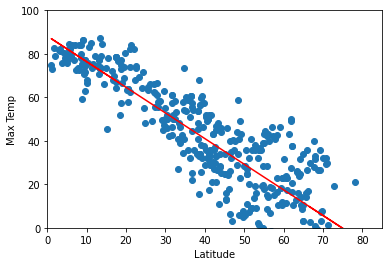

This graph shows us that there is a fairly strong correlation between latitude and maximum temperature. The closer to zero the latitude of a city is in the Northern Hemisphere, the higher the temperature.


<Figure size 432x288 with 0 Axes>

In [43]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(0,100)
plt.xlim(0,85)

plt.ylabel("Max Temp")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is a fairly strong correlation between latitude and maximum temperature. The closer to zero the latitude of a city is in the Northern Hemisphere, the higher the temperature.')
plt.savefig("LATvMaxTemp-North.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

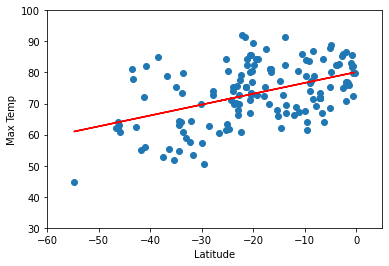

This graph shows us that there is a loose correlation between latitude and maximum temperature in the Southern Hemisphere. The closer to zero, the higher the tempature. The correlation does not appear as strong as the previous graph.


<Figure size 432x288 with 0 Axes>

In [44]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(30, 100)
plt.xlim(-60, 5)

plt.ylabel("Max Temp")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is a loose correlation between latitude and maximum temperature in the Southern Hemisphere. The closer to zero, the higher the tempature. The correlation does not appear as strong as the previous graph.')
plt.savefig("LATvMaxTemp-South.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

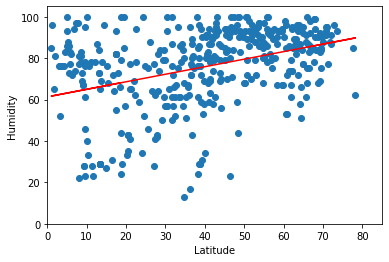

This graph shows us that there does not appear to be much correlation between latitude and humidity in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [45]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(0,105)
plt.xlim(0,85)

plt.ylabel("Humidity")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there does not appear to be much correlation between latitude and humidity in the Northern Hemisphere.')
plt.savefig("LATvHum-North.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

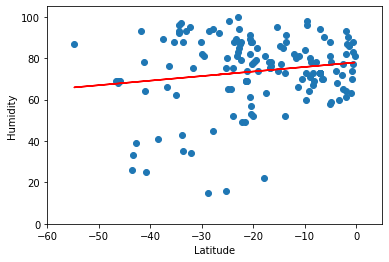

This graph shows us that there is not much correlation between humidity and latitude in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [46]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(0, 105)
plt.xlim(-60, 5)

plt.ylabel("Humidity")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is not much correlation between humidity and latitude in the Southern Hemisphere.')
plt.savefig("LATvHum-South.png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

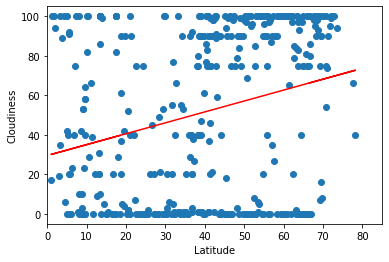

This graph shows us that there is no correlation between cloudiness and the latitude of a city in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [47]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(-5,105)
plt.xlim(0,85)

plt.ylabel("Cloudiness")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is no correlation between cloudiness and the latitude of a city in the Northern Hemisphere.')
plt.savefig("LATvCloud-North.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

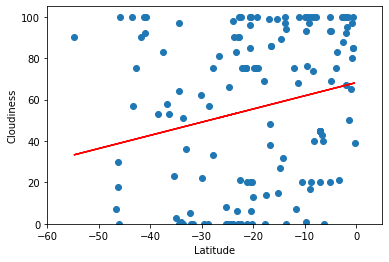

This graph shows us that there is no correlation between cloudiness and the latitude of a city in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [48]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(0, 105)
plt.xlim(-60, 5)

plt.ylabel("Cloudiness")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is no correlation between cloudiness and the latitude of a city in the Southern Hemisphere.')
plt.savefig("LATvCloud-South.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

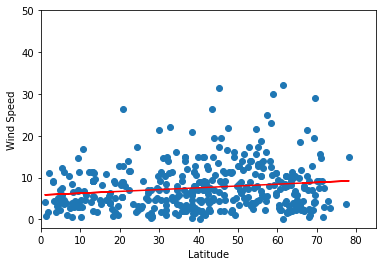

This graph shows us that there is not much correlation between wind speed and latitude in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [50]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(-2,50)
plt.xlim(0,85)

plt.ylabel("Wind Speed")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is not much correlation between wind speed and latitude in the Northern Hemisphere.')
plt.savefig("LATvWind-North.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

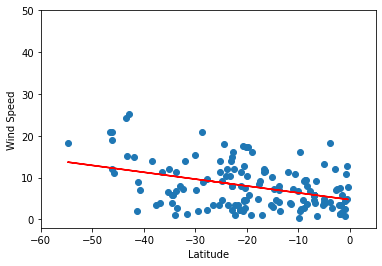

This graph shows us that there is not much correlation between wind speed and latitude in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [53]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"red")

plt.ylim(-2, 50)
plt.xlim(-60, 5)

plt.ylabel("Wind Speed")
plt.xlabel('Latitude')
plt.show()

print('This graph shows us that there is not much correlation between wind speed and latitude in the Southern Hemisphere.')
plt.savefig("LATvWind-South.png")

